**Author:** Matt Sarmiento

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Clean" data-toc-modified-id="Data-Clean-1">Data Clean</a></span><ul class="toc-item"><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.1">Datasets</a></span></li><li><span><a href="#Synthetic-Opioids" data-toc-modified-id="Synthetic-Opioids-1.2">Synthetic Opioids</a></span></li><li><span><a href="#All-Drugs" data-toc-modified-id="All-Drugs-1.3">All Drugs</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2">Plot</a></span></li></ul></div>

In [2]:
# Third-party libs
import pandas as pd

In [3]:
# Load rpy2 extension (may need to re-run)
%reload_ext rpy2.ipython

In [7]:
# Load R libraries
%R library(ggplot2, scales)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

--------------

# Data Clean

## Datasets

We'll look at the following two datasets, each of which covers the period from 1999-2017.
1. Deaths per year due to synthetic opioids.
2. Deaths per year due to all drugs.

In [43]:
# Deaths due to synthetic opioids (e.g. fentanyl) per year
synthetic = pd.read_csv('../input/synthetic-deaths-per-year.csv', sep='\t')

# Deaths from all drugs per year
drugs = pd.read_csv('../input/deaths-per-year.csv', sep='\t')

## Synthetic Opioids 


In [44]:
synthetic.head(3)

,Notes,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,1999.0,1999.0,730.0,279040168.0,0.3,0.3
1,NaN,2000.0,2000.0,782.0,281421906.0,0.3,0.3
2,NaN,2001.0,2001.0,957.0,284968955.0,0.3,0.3


In [45]:
# Drop Notes column
synthetic = synthetic.drop(columns=["Notes"])

# Drop rows with Year = NaN
synthetic = synthetic.loc[synthetic.Year.isna() == False]

In [164]:
synthetic.head(3)

,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,1999.0,1999.0,730.0,279040168.0,0.3,0.3
1,2000.0,2000.0,782.0,281421906.0,0.3,0.3
2,2001.0,2001.0,957.0,284968955.0,0.3,0.3


In [176]:
# Split frame at jump in fentanyl overdoses (2014-15)
synthetic_pre2014 = synthetic[:15]
synthetic_post2014 = synthetic[14:]

## All Drugs

In [47]:
# Drop Notes column
drugs = drugs.drop(columns=["Notes"])

# Drop rows with Year = Nan
drugs = drugs.loc[drugs.Year.isna() == False]

In [163]:
drugs.head(3)

,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,1999.0,1999.0,16849.0,279040168.0,6.0,6.1
1,2000.0,2000.0,17415.0,281421906.0,6.2,6.2
2,2001.0,2001.0,19394.0,284968955.0,6.8,6.8


In [177]:
# Split frame at jump in fentanyl overdoses (2014-15)
drugs_pre2014 = drugs[:15]
drugs_post2014 = drugs[14:]

---------------

# Plot

In [178]:
# Push data to R
%R -i synthetic_pre2014
%R -i synthetic_post2014
%R -i drugs_pre2014
%R -i drugs_post2014

In [290]:
%%R

# Custom Theme
theme_custom <- theme(panel.grid.major = element_blank(),
                      panel.grid.minor = element_blank(),
                      axis.text.y = element_blank(),
                      axis.title = element_blank(),
                      plot.title = element_text(size = 24, colour = "grey20", vjust = 2),
                      plot.subtitle = element_text(size = 16, colour = "grey40", vjust = 0))

# Colours
highlight = "violetred2"

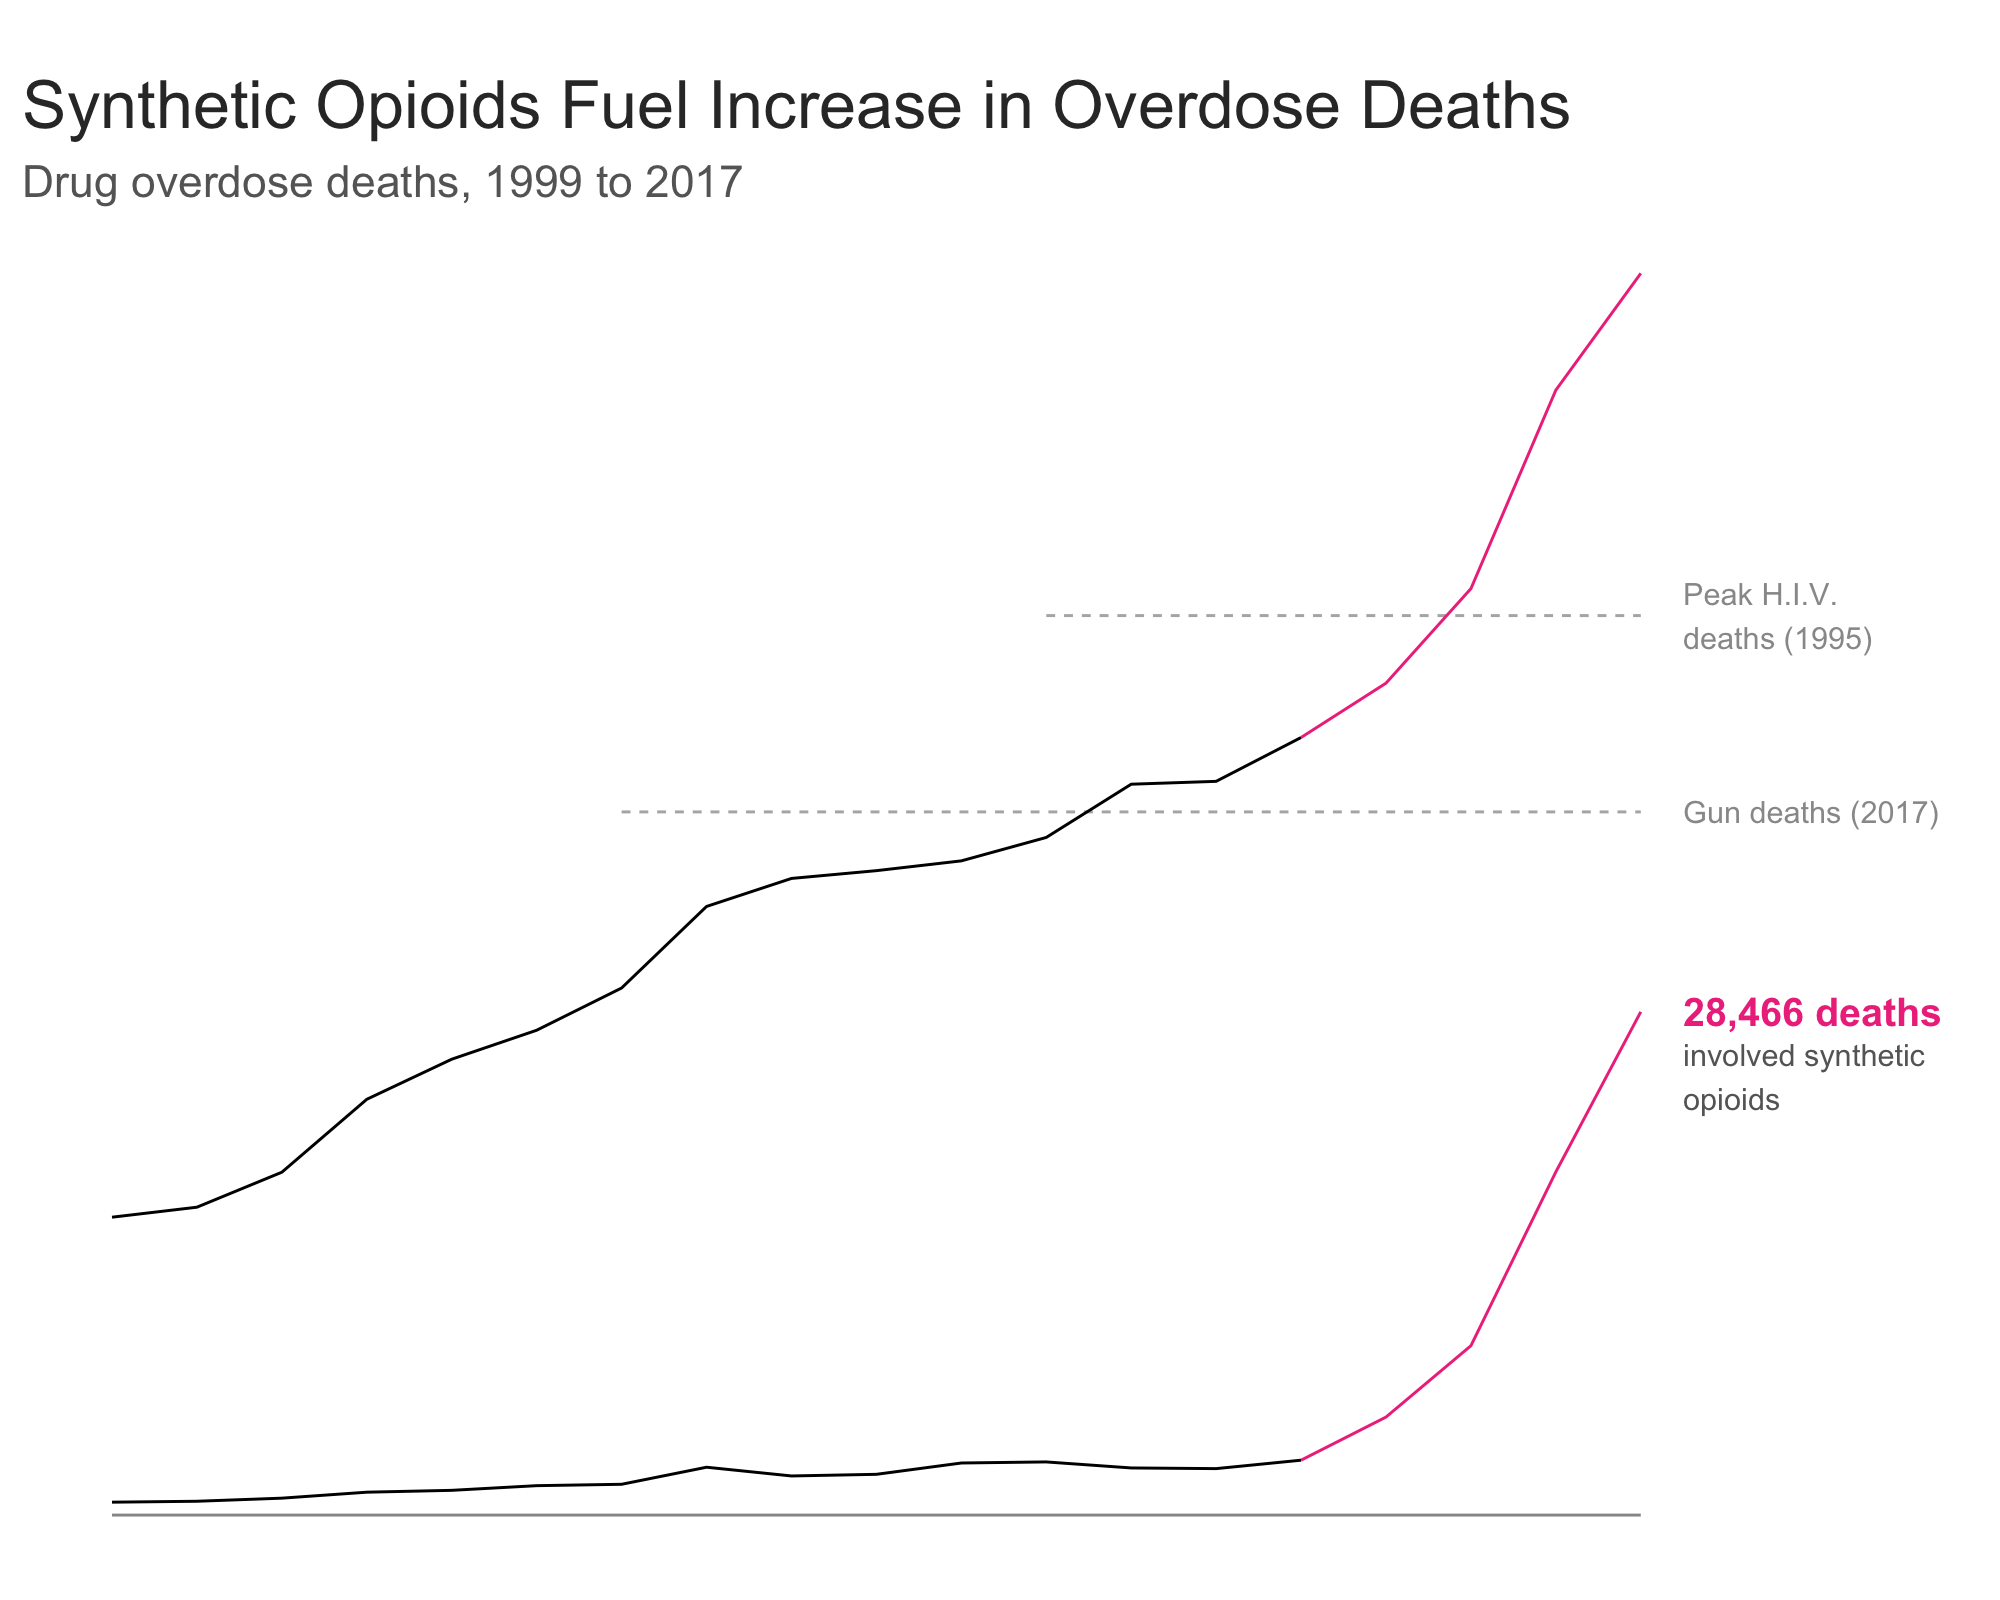

In [320]:
%%R -h 8 -w 10 -u in -r 200

# Base
q <- ggplot()

# AIDS horizontal ref
q <- q + geom_segment(aes(x = 2010, y = 50877, xend = 2017, yend = 50877), linetype = "33", colour = "grey70")
q <- q + annotate("text", label = "Peak H.I.V.\ndeaths (1995)", x = 2017.5, y = 50877, hjust = 0, colour = "grey60")

# 2017 Gun deaths horizontal ref
q <- q + geom_segment(aes(x = 2005, y = 39773, xend = 2017, yend = 39773), linetype = "33", colour = "grey70")
q <- q + annotate("text", label = "Gun deaths (2017)", x = 2017.5, y = 39773, hjust = 0, colour = "grey60")

# Pre-2014 lines
q <- q + geom_line(aes(x = Year, y = Deaths), data = drugs_pre2014)
q <- q + geom_line(aes(x = Year, y = Deaths), data = synthetic_pre2014)

# Post-2014 lines
q <- q + geom_line(aes(x = Year, y = Deaths), data = drugs_post2014, colour = highlight)
q <- q + geom_line(aes(x = Year, y = Deaths), data = synthetic_post2014, colour = highlight)

# Annotations
q <- q + annotate("text", label = "28,466 deaths", x = 2017.5, y = 28466, hjust = 0, fontface = "bold", size = 5,
                  colour = highlight)
q <- q + annotate("text", label = "involved synthetic\nopioids", x = 2017.5, y = 24800, hjust = 0, 
                  colour = "grey40")

# Titles
q <- q + labs(title = "\nSynthetic Opioids Fuel Increase in Overdose Deaths")
q <- q + labs(subtitle = "Drug overdose deaths, 1999 to 2017")

# Axes
q <- q + scale_x_continuous(limits = c(1999, 2020), labels = NULL)
q <- q + geom_segment(aes(x = 1999, y = 0, xend = 2017, yend = 0), colour = "grey40", alpha = 0.7)

# Themes
q <- q + theme_minimal() + theme_custom

q